<a href="https://colab.research.google.com/github/kzebibi/EDA/blob/main/Linear_regression_tv_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
!kaggle datasets download -d devzohaib/tvmarketingcsv

Dataset URL: https://www.kaggle.com/datasets/devzohaib/tvmarketingcsv
License(s): unknown
  0% 0.00/74.2k [00:00<?, ?B/s]
100% 74.2k/74.2k [00:00<00:00, 43.7MB/s]


In [4]:
!unzip /content/tvmarketingcsv.zip

Archive:  /content/tvmarketingcsv.zip
  inflating: .gitignore              
  inflating: Case_study_Simple_Linear_Regression.ipynb  
  inflating: README.md               
  inflating: tvmarketing.csv         


In [5]:
import pandas as pd

In [6]:
# Reading csv file from github repo
advertising = pd.read_csv('tvmarketing.csv')

Now, let's check the structure of the advertising dataset.

In [7]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [8]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [9]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [11]:
# Let's look at some statistical information about the dataframe.
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# Visualising Data Using Plot

<Axes: xlabel='TV', ylabel='Sales'>

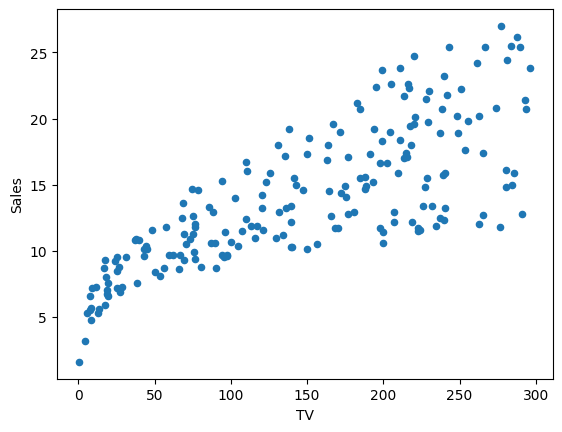

In [12]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows:

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [13]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


## Feature scaling techniques

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X.values.reshape(-1, 1))

## Performing Linear Regression

In [16]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()


In [17]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lr, X=X, y=y,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lr, X=X, y=y, cv=5, method='predict', n_jobs=-1)

RMSE Scores Using LinearRegression --- [3.2399 3.0331 3.1101 3.2364 3.7588]
Mean of RMSE Scores Using LinearRegression --- 3.2757
************************************************************************************************************************


#### Computing RMSE and R^2 Values
RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model


In [18]:
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the sameidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y, y_pred_lin))
mae_pred_lin = mean_absolute_error(y, y_pred_lin)
r2_pred_lin = r2_score(y, y_pred_lin)
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')
print(f'MAE after prediction Using LinearRegression --- {mae_pred_lin:.4f}')
print(f'R2 SCORE after prediction Using LinearRegression --- {r2_pred_lin:.4f}')

RMSE after prediction Using LinearRegression --- 3.2855
MAE after prediction Using LinearRegression --- 2.5819
R2 SCORE after prediction Using LinearRegression --- 0.6015


In [19]:
y.shape # cheek the shape to generate the index for plot

(200,)

Text(0, 0.5, 'Sales')

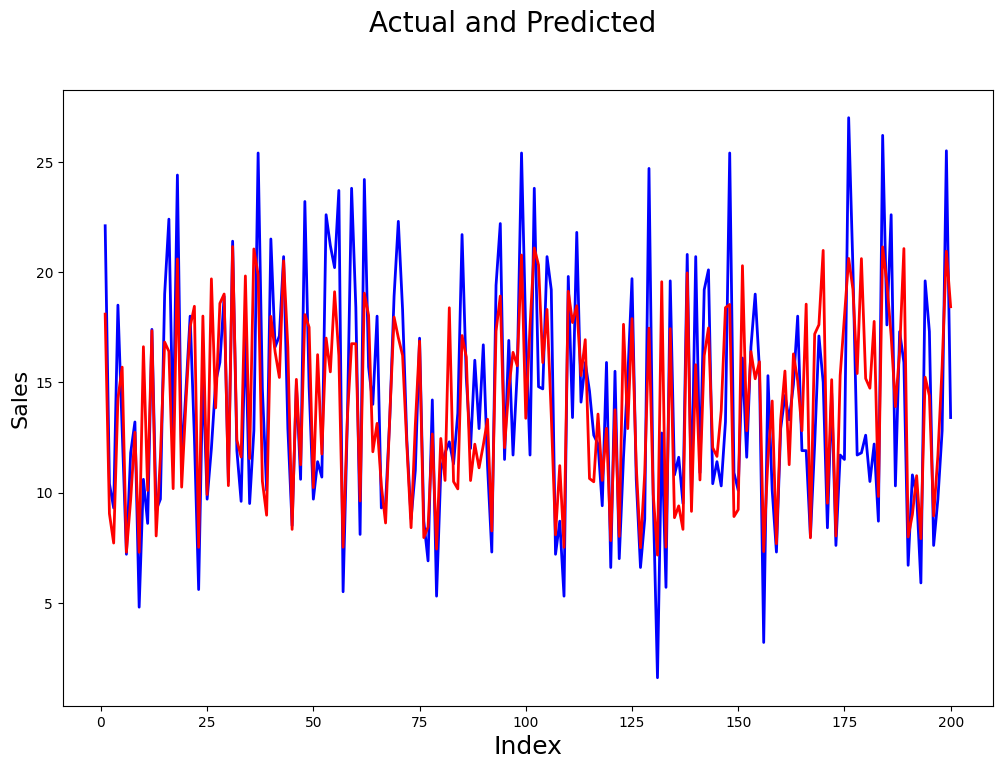

In [20]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,201,1)]         # generating index
fig = plt.figure(figsize=(12, 8))
plt.plot(c,y, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred_lin, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'y-ypred_lin')

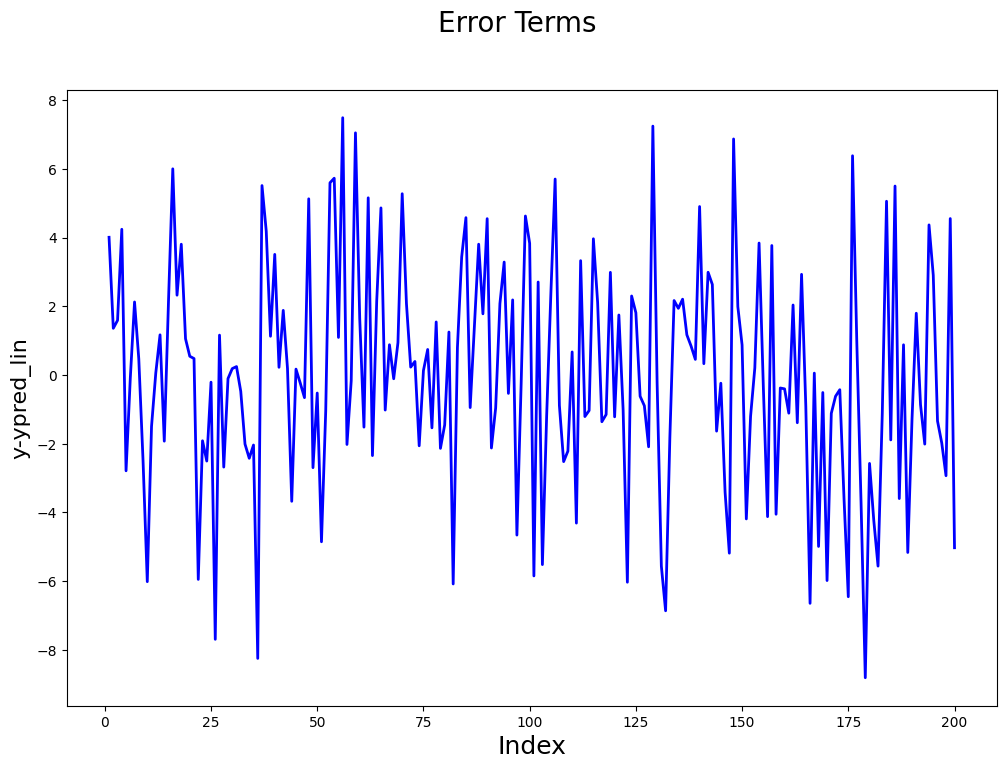

In [21]:
# Error terms
c = [i for i in range(1,201,1)]
fig = plt.figure(figsize=(12, 8))
plt.plot(c,y-y_pred_lin, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y-ypred_lin', fontsize=16)                # Y-label

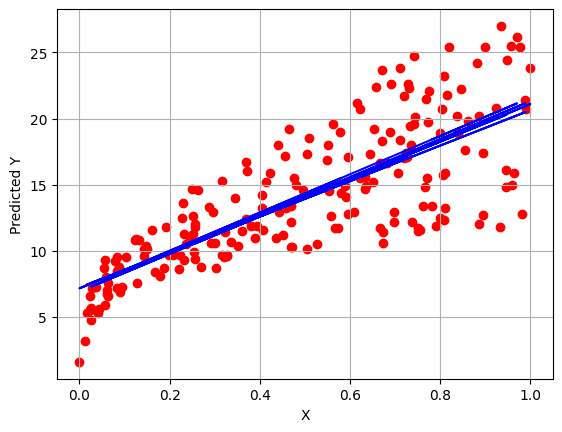

In [24]:
import matplotlib.pyplot as plt
plt.plot(X,y_pred_lin,c='blue')
plt.scatter(X, y, c='r')
plt.xlabel('X')
plt.ylabel('Predicted Y')
plt.grid()


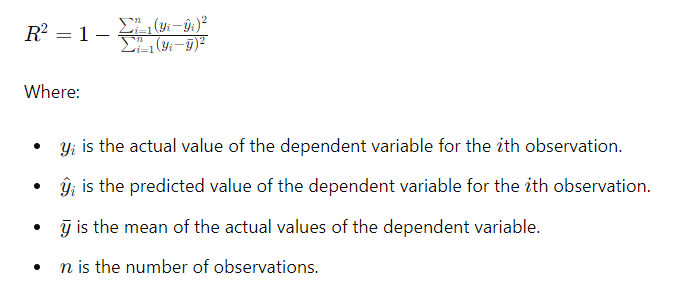

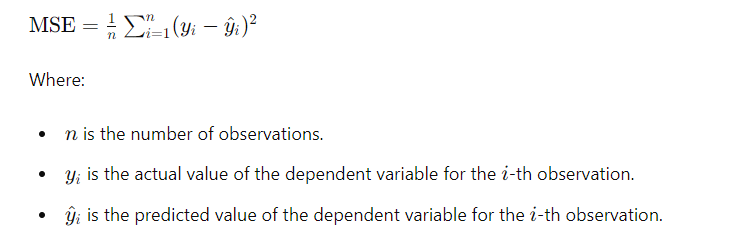